In [24]:
!git clone https://github.com/Abdulrhmanmg0/SIC_Project.git

fatal: destination path 'SIC_Project' already exists and is not an empty directory.


In [2]:

#No need to applay it, We instad used specific method to do all of that""ImageDataGenerator""


# this use to spilt data
#import os
#import shutil
#from sklearn.model_selection import train_test_split

#input_folder = '/content/SIC_Project/AutisticDataSet'
#output_folder = '/content/spilt1'


#train_ratio = 0.7
#val_ratio = 0.15
#test_ratio = 0.15

# Get the list of files in the input folder
#files = os.listdir(input_folder)

# Split the data into train, validation, and test sets
#train_files, val_test_files = train_test_split(files, train_size=train_ratio, random_state=42)
#val_files, test_files = train_test_split(val_test_files, train_size=val_ratio/(val_ratio + test_ratio), random_state=42)

# Create output folders
#os.makedirs(output_folder, exist_ok=True)
#os.makedirs(os.path.join(output_folder, 'train'), exist_ok=True)
#os.makedirs(os.path.join(output_folder, 'val'), exist_ok=True)
#os.makedirs(os.path.join(output_folder, 'test'), exist_ok=True)

# Move files to respective folders
#for file in train_files:
    #shutil.copy2(os.path.join(input_folder, file), os.path.join(output_folder, 'train'))

#for file in val_files:
    #shutil.copy2(os.path.join(input_folder, file), os.path.join(output_folder, 'val'))

#for file in test_files:
    #shutil.copy2(os.path.join(input_folder, file), os.path.join(output_folder, 'test'))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


FileNotFoundError: [Errno 2] No such file or directory: '/content/SIC_Project/AutisticDataSet'

In [25]:
# Libraries

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [27]:
#EDA OVER THE ImageDataGenerator

# normalize and resize the data
path = 'SIC_Project/CODE/Split_Data/'
BatchSize = 32
ImageSize = (224,224)

train_datagen = ImageDataGenerator(
        width_shift_range=0.2,
        height_shift_range=0.2,
        rotation_range=40,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        featurewise_center=True,
        featurewise_std_normalization=True)

val_datagen = ImageDataGenerator(rescale=1./255,)

train_generator = train_datagen.flow_from_directory(
        path+'train',
        target_size=ImageSize,
        batch_size=BatchSize,
        class_mode='binary',
        shuffle=False)

validation_generator = val_datagen.flow_from_directory(
        path+'val',
        target_size=ImageSize,
        batch_size=BatchSize,
        class_mode='binary',
        shuffle=False)

test_data = ImageDataGenerator(rescale=1./255,)

test_generator = test_data.flow_from_directory(
        path+'test',
        target_size=ImageSize,
        batch_size=BatchSize,
        class_mode='binary',
        shuffle=False)


Found 1984 images belonging to 2 classes.
Found 416 images belonging to 2 classes.
Found 416 images belonging to 2 classes.


In [28]:
#check of batchs number and label
train_generator.reset()
batch_index=0
while batch_index <= train_generator.batch_index:
	imgs,y = train_generator.next()
	real_batch_size=len(imgs)
	idx = batch_index * real_batch_size
	img_file_names=train_generator.filenames[idx : idx + real_batch_size]
	print('------------------------------------------------------------------')
	print('Batch number %d contains %d images'%(batch_index+1,real_batch_size))
	print('-----------------------------------------------------------------+')
	for i in range(0,real_batch_size):
		print(img_file_names[i],y[i])
	batch_index=batch_index+1

------------------------------------------------------------------
Batch number 1 contains 32 images
-----------------------------------------------------------------+
Autistic/Autistic.0.jpg 0.0
Autistic/Autistic.10.jpg 0.0
Autistic/Autistic.100.jpg 0.0
Autistic/Autistic.1001.jpg 0.0
Autistic/Autistic.1004.jpg 0.0
Autistic/Autistic.1005.jpg 0.0
Autistic/Autistic.1006.jpg 0.0
Autistic/Autistic.1007.jpg 0.0
Autistic/Autistic.1008.jpg 0.0
Autistic/Autistic.1010.jpg 0.0
Autistic/Autistic.1012.jpg 0.0
Autistic/Autistic.1013.jpg 0.0
Autistic/Autistic.1015.jpg 0.0
Autistic/Autistic.1016.jpg 0.0
Autistic/Autistic.1017.jpg 0.0
Autistic/Autistic.102.jpg 0.0
Autistic/Autistic.1020.jpg 0.0
Autistic/Autistic.1021.jpg 0.0
Autistic/Autistic.1022.jpg 0.0
Autistic/Autistic.1023.jpg 0.0
Autistic/Autistic.1025.jpg 0.0
Autistic/Autistic.1026.jpg 0.0
Autistic/Autistic.1027.jpg 0.0
Autistic/Autistic.1028.jpg 0.0
Autistic/Autistic.1029.jpg 0.0
Autistic/Autistic.103.jpg 0.0
Autistic/Autistic.1030.jpg 0.0
Aut

In [30]:
#not that necwssery to run

validation_generator.reset()
batch_index=0
while batch_index <= validation_generator.batch_index:
	imgs,y = validation_generator.next()
	real_batch_size=len(imgs)
	idx = batch_index * real_batch_size
	img_file_names=validation_generator.filenames[idx : idx + real_batch_size]
	print('------------------------------------------------------------------')
	print('Batch number %d contains %d images'%(batch_index+1,real_batch_size))
	print('-----------------------------------------------------------------+')
	for i in range(0,real_batch_size):
		print(img_file_names[i],y[i])
	batch_index=batch_index+1

------------------------------------------------------------------
Batch number 1 contains 32 images
-----------------------------------------------------------------+
Autistic/Autistic.1000.jpg 0.0
Autistic/Autistic.1003.jpg 0.0
Autistic/Autistic.1011.jpg 0.0
Autistic/Autistic.1014.jpg 0.0
Autistic/Autistic.1019.jpg 0.0
Autistic/Autistic.1024.jpg 0.0
Autistic/Autistic.1042.jpg 0.0
Autistic/Autistic.1061.jpg 0.0
Autistic/Autistic.1063.jpg 0.0
Autistic/Autistic.1070.jpg 0.0
Autistic/Autistic.1074.jpg 0.0
Autistic/Autistic.1079.jpg 0.0
Autistic/Autistic.109.jpg 0.0
Autistic/Autistic.1090.jpg 0.0
Autistic/Autistic.1091.jpg 0.0
Autistic/Autistic.1097.jpg 0.0
Autistic/Autistic.1101.jpg 0.0
Autistic/Autistic.1102.jpg 0.0
Autistic/Autistic.1104.jpg 0.0
Autistic/Autistic.1109.jpg 0.0
Autistic/Autistic.1122.jpg 0.0
Autistic/Autistic.1123.jpg 0.0
Autistic/Autistic.1130.jpg 0.0
Autistic/Autistic.1132.jpg 0.0
Autistic/Autistic.1136.jpg 0.0
Autistic/Autistic.1145.jpg 0.0
Autistic/Autistic.1148.jpg 

In [32]:
#NOT NECESSARY TO RUN

test_generator.reset()
batch_index=0
while batch_index <= test_generator.batch_index:
	imgs,y = test_generator.next()
	real_batch_size=len(imgs)
	idx = batch_index * real_batch_size
	img_file_names=test_generator.filenames[idx : idx + real_batch_size]
	print('------------------------------------------------------------------')
	print('Batch number %d contains %d images'%(batch_index+1,real_batch_size))
	print('-----------------------------------------------------------------+')
	for i in range(0,real_batch_size):
		print(img_file_names[i],y[i])
	batch_index=batch_index+1

------------------------------------------------------------------
Batch number 1 contains 32 images
-----------------------------------------------------------------+
Autistic/Autistic.1.jpg 0.0
Autistic/Autistic.1002.jpg 0.0
Autistic/Autistic.1009.jpg 0.0
Autistic/Autistic.101.jpg 0.0
Autistic/Autistic.1018.jpg 0.0
Autistic/Autistic.1032.jpg 0.0
Autistic/Autistic.1036.jpg 0.0
Autistic/Autistic.1043.jpg 0.0
Autistic/Autistic.1046.jpg 0.0
Autistic/Autistic.1052.jpg 0.0
Autistic/Autistic.1055.jpg 0.0
Autistic/Autistic.1056.jpg 0.0
Autistic/Autistic.1077.jpg 0.0
Autistic/Autistic.1081.jpg 0.0
Autistic/Autistic.1084.jpg 0.0
Autistic/Autistic.110.jpg 0.0
Autistic/Autistic.1103.jpg 0.0
Autistic/Autistic.1105.jpg 0.0
Autistic/Autistic.1114.jpg 0.0
Autistic/Autistic.1115.jpg 0.0
Autistic/Autistic.1119.jpg 0.0
Autistic/Autistic.1121.jpg 0.0
Autistic/Autistic.1124.jpg 0.0
Autistic/Autistic.1125.jpg 0.0
Autistic/Autistic.1128.jpg 0.0
Autistic/Autistic.1129.jpg 0.0
Autistic/Autistic.1142.jpg 0.0


In [33]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 128)     

In [36]:
# Train the model
#Make sure that my labtop not getting into sleep mood auto,SO change that in setting
#here i can increase the #epochs in form to enhance the accuercey of the model {like hyperparameter}

with tf.device('/device:GPU:0'):
  history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      epochs=120,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // validation_generator.batch_size
  )

  # Evaluate the model on the test set
  test_loss, test_accuracy = model.evaluate(test_generator)
  print(f'Test Loss: {test_loss:.4f}')
  print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/120
62/62 [==============================] - 26s 418ms/step - loss: 0.5794 - accuracy: 0.7026 - val_loss: 0.5367 - val_accuracy: 0.7212
Epoch 2/120
62/62 [==============================] - 26s 413ms/step - loss: 0.5886 - accuracy: 0.7102 - val_loss: 0.5979 - val_accuracy: 0.6394
Epoch 3/120
62/62 [==============================] - 26s 426ms/step - loss: 0.5943 - accuracy: 0.7016 - val_loss: 0.5657 - val_accuracy: 0.7356
Epoch 4/120
62/62 [==============================] - 26s 426ms/step - loss: 0.5704 - accuracy: 0.7056 - val_loss: 0.5295 - val_accuracy: 0.7236
Epoch 5/120
62/62 [==============================] - 26s 425ms/step - loss: 0.5830 - accuracy: 0.6961 - val_loss: 0.5525 - val_accuracy: 0.7260
Epoch 6/120
62/62 [==============================] - 26s 419ms/step - loss: 0.6079 - accuracy: 0.6764 - val_loss: 0.5074 - val_accuracy: 0.7644
Epoch 7/120
62/62 [==============================] - 26s 423ms/step - loss: 0.5681 - accuracy: 0.7142 - val_loss: 0.5093 - val_accuracy:

In [38]:
model.save('model7861.keras')

In [39]:
import keras
saved_model = keras.models.load_model("model7861.keras")
saved_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 128)     

1/1 [==============================] - 0s 37ms/step


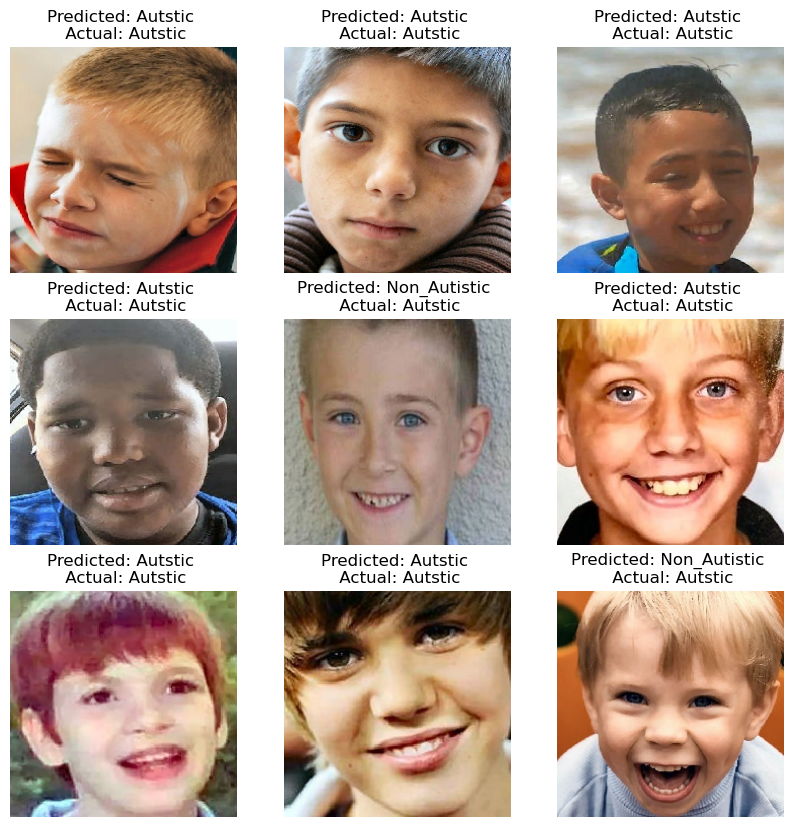

In [42]:
import random
import matplotlib.pyplot as plt

true_labels = test_generator.classes
file_names = test_generator.filenames

random_indices = random.sample(range(len(test_generator)), 9)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, index in enumerate(random_indices):
    image, _ = test_generator[index]
    prediction = saved_model.predict(image)[0]
    predicted_label = 1 if prediction < 0.5 else 0
    true_label = true_labels[index]

    predicted_label = 'Autstic' if predicted_label == 0 else 'Non_Autistic'
    true_label  = 'Autstic' if true_label == 0 else 'Non_Autistic'

    ax = axes[i // 3, i % 3]
    ax.imshow(image[0])
    ax.axis('off')
    ax.set_title(f'Predicted: {predicted_label} \n Actual: {true_label}')

In [45]:
path = "/content/SIC_Project/CODE/Split_Data/test/Autistic/Autistic.1055.jpg"
img = image = tf.keras.utils.load_img(path , target_size=(224, 224))

input_arr = tf.keras.utils.img_to_array(img)
input_arr = np.array([input_arr])
predict = saved_model.predict(input_arr)

predicted_label = 1 if predict < 0.5 else 0
true_label = path.split('/')

predicted_label = 'Autstic' if predicted_label == 0 else 'Non_Autistic'


plt.title(f'Predicted: {predicted_label} \n Actual: {true_label[6]}')
plt.imshow(img)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/SIC_Project/CODE/Split_Data/test/Autistic/Autistic.1055.jpg'